In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import lightgbm as lgb
import math

In [229]:
test_df = pd.read_csv('test.csv')

df_train = pd.read_csv('train_clean.csv')
df_test = pd.read_csv('test_clean.csv')

target= df_train['SalePrice']
df_train = df_train.drop(['SalePrice'],axis=1)

In [230]:
x_train,x_test,y_train,y_test = train_test_split(df_train,target,test_size=0.33,random_state=0)

In [231]:
lgb_train = lgb.Dataset(x_train, y_train)

In [232]:
params = {
    'objective': 'regression',
    'num_leaves': 4,
    'learning_rate': 0.01,
    'n_estimators': 12000,
    'max_bin': 200,
    'bagging_fraction': 0.60,
    'bagging_freq': 5,
    'bagging_seed': 7,
    'feature_fraction': 0.4,
}

In [233]:
gbm = lgb.train(params, lgb_train, num_boost_round=50)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2997
[LightGBM] [Info] Number of data points in the train set: 978, number of used features: 134
[LightGBM] [Info] Start training from score 181410.466258


In [234]:
predict1 = gbm.predict(x_test)

In [235]:
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict1))))

Root Mean Square Error test = 26828.469259433765


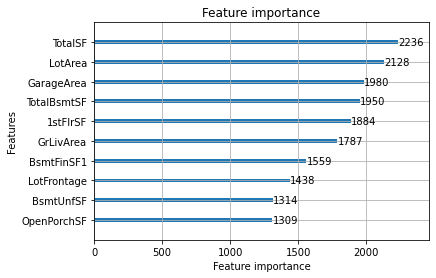

In [236]:
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

In [237]:
lgb_train = lgb.Dataset(df_train, target)

In [238]:
gbm = lgb.train(params, lgb_train, num_boost_round=50)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines


C:\Users\chris\anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3370
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 149
[LightGBM] [Info] Start training from score 180921.195890


In [239]:
predict = gbm.predict(df_test)

In [240]:
submission = pd.DataFrame({
        "Id": test_df["Id"],
        "SalePrice": predict
    })
submission.to_csv('submission.csv', index=False)